In [1]:
import numpy as np
from qiskit import *
from math import pi
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
backend = BasicAer.get_backend('unitary_simulator') #connection au backend d'IBM
NOMBRE_MESURE = 10000 #nombre de mesure pour estimer une probabilité
TF = 5 #temps final
NOMBRE_POINTS = 1000 #nombre de points pour tracer la courbe

In [3]:
def Ramsey(omega,t):
    global NOMBRE_MESURE
    q = QuantumRegister(1) #création qbit
    c = ClassicalRegister(1) #création d'un registre classique pour mesure
    circ=QuantumCircuit(q,c)
    circ.u(pi/2,0,0,q) #mise en état de superposition
    circ.p(-omega*t,q) #application de l'hamiltonien
    circ.u(pi/2,0,0,q) 
    circ.draw()
    circ.barrier(range(1))
    circ.measure(q,c) #mesure
    backend = AerSimulator()
    qc_compiled = transpile(circ, backend)
    job_sim = backend.run(qc_compiled, shots=NOMBRE_MESURE) #on simule l'expérience NOMBRE_MESURE fois
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc_compiled) #on récupère le nombre d'état "0" et "1" pbtenus
    return counts
    

{'1': 4944, '0': 5056}


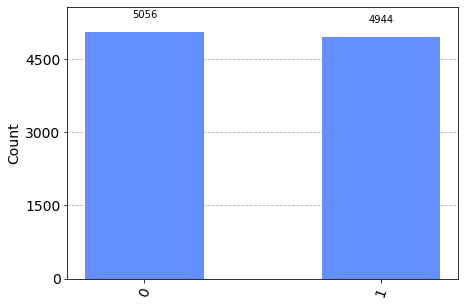

In [5]:
counts = Ramsey(pi/2,1)
print(counts)
plot_histogram(counts)

In [6]:
def Ramsey_measurement(omega):
    global NOMBRE_MESURE
    global TF
    global NOMBRE_POINTS
    temps = np.linspace(0,TF,NOMBRE_POINTS) #échantillonnage
    P=[]
    for k in temps: #on trace chaque point 1 par 1
        counts = Ramsey(omega,k)
        if len(counts) != 2: #exception s'il n'uy a que des "0" ou des "1"
            if counts == {'0':NOMBRE_MESURE}:
                proba = 0
            else:
                proba = 1
        else:
            proba = counts['1'] / (counts['1'] + counts['0']) #on calcule la probabilité que le qbit soit dans l'état "1"
        P.append(proba)
    return P


In [7]:
def Ramsey_graphe(omega): #tracage de la courbe
    global TF
    global NOMBRE_POINTS
    P = Ramsey_measurement(pi/2)
    temps = np.linspace(0,TF,NOMBRE_POINTS)
    plt.plot(temps, P)
    plt.show()

In [ ]:
Ramsey_graphe(pi/2)